2014


/home/anvitha/.local/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


2015


/home/anvitha/.local/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


2016


/home/anvitha/.local/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


2017


/home/anvitha/.local/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


2018


/home/anvitha/.local/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


2019


/home/anvitha/.local/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


2020


/home/anvitha/.local/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


2021


/home/anvitha/.local/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


2022


/home/anvitha/.local/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


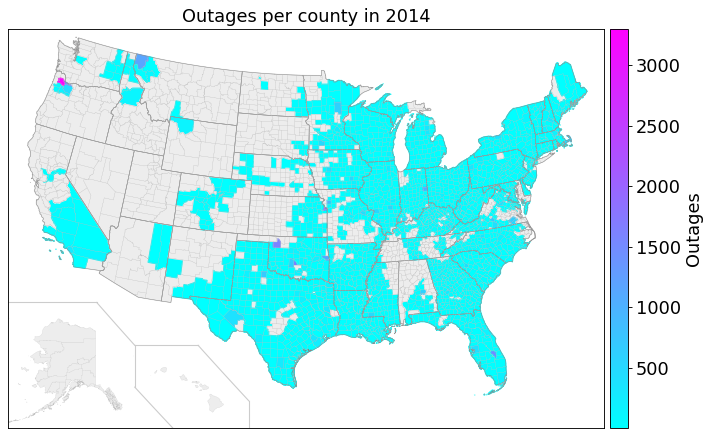

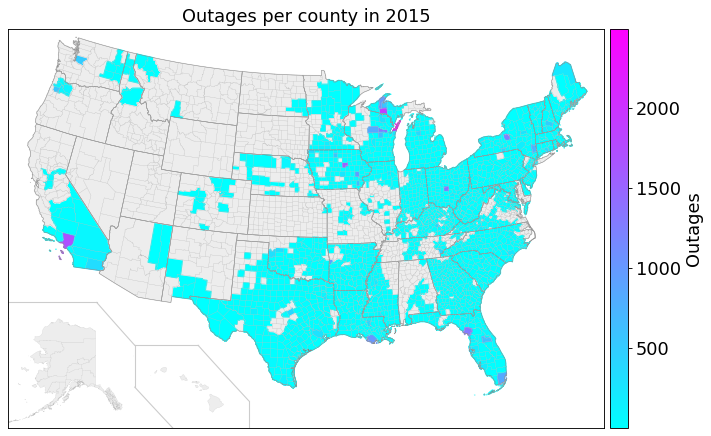

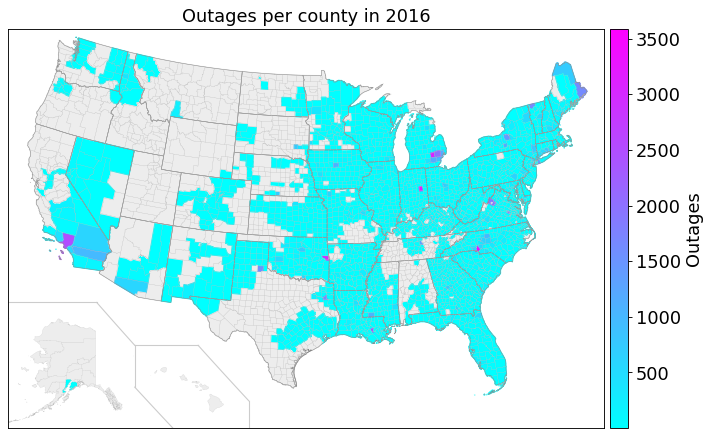

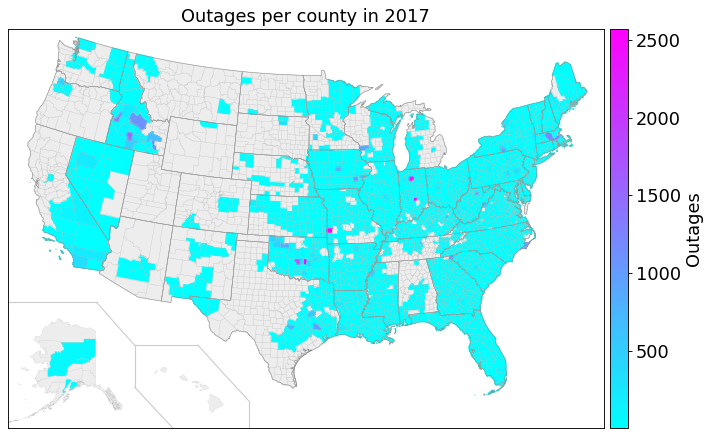

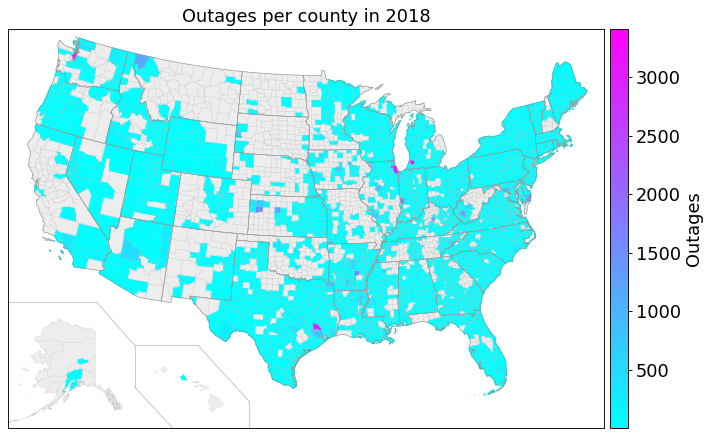

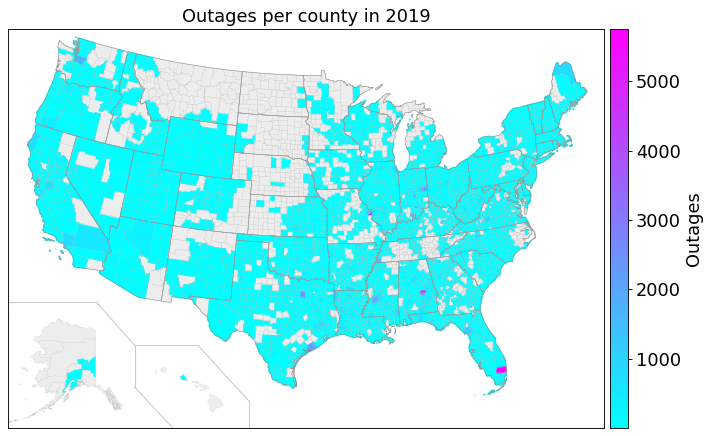

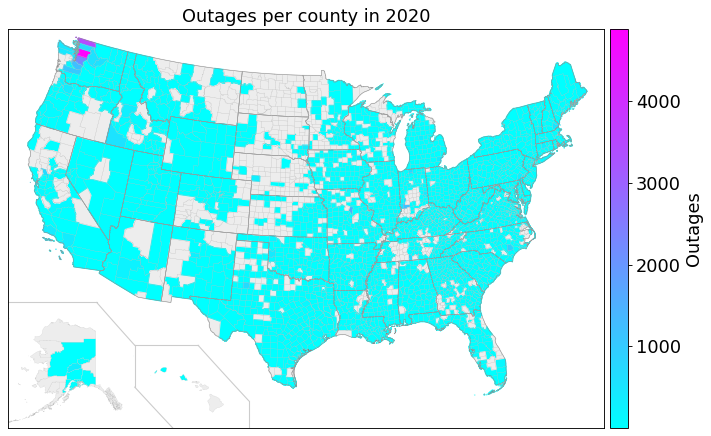

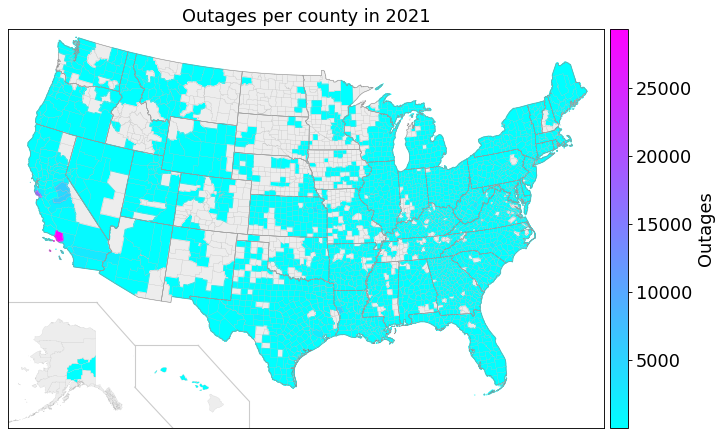

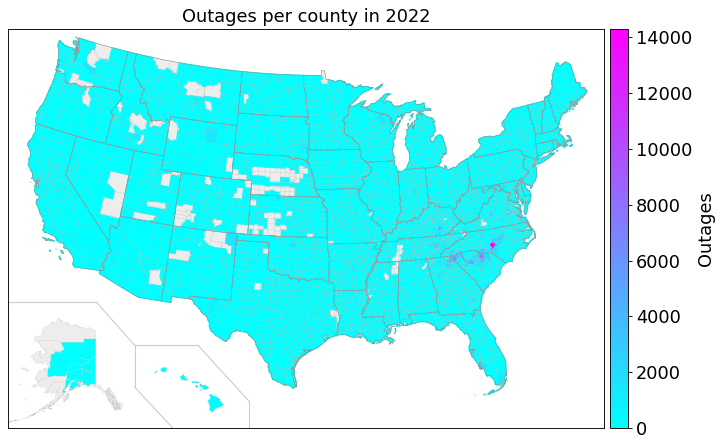

In [18]:
import pandas
import urllib.request, json 
import plot_utils as pu

for year in range(2014,2023):
    print(str(year))
    path = "updated EAGLE-I/eaglei_outages_" + str(year) + ".csv"
    df = pandas.read_csv(path)
    df = df.rename(columns={'fips_code':'FIPS_code'})
    df['FIPS_code'] = df['FIPS_code'].astype(str).str.zfill(5)
    pu.choropleth_map_county(df,
        map_title='Outages per county in ' + str(year),
        unit='Outages',dpi=80, fontsize=16,cmap='cool',
    );

In [15]:
print(df)

         FIPS_code  customers_out
0             1005              4
1             1009            160
2             1051              3
3             1055              4
4             1057              4
...            ...            ...
1048570      20137              1
1048571      20141              1
1048572      20147           1233
1048573      20153              1
1048574      20163              5

[1048575 rows x 2 columns]


In [16]:
!pip install basemap